In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator #me
from keras import layers #me
import numpy as np
from keras import models #me
import matplotlib.pyplot as plt


In [2]:
(train_dataset, test_dataset), info = tfds.load('cats_vs_dogs',
                                                split=['train[:80%]', 'train[80%:]'],
                                                with_info=True, as_supervised=True)

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess).cache().shuffle(1000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#create your model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.45),  # Dropout to prevent overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
582/582 [==============================] - 48s 68ms/step - loss: 0.6457 - accuracy: 0.6135 - val_loss: 0.5633 - val_accuracy: 0.6958
Epoch 2/10
582/582 [==============================] - 19s 33ms/step - loss: 0.4989 - accuracy: 0.7584 - val_loss: 0.4425 - val_accuracy: 0.7958
Epoch 3/10
582/582 [==============================] - 18s 30ms/step - loss: 0.4101 - accuracy: 0.8127 - val_loss: 0.4094 - val_accuracy: 0.8104
Epoch 4/10
582/582 [==============================] - 18s 30ms/step - loss: 0.3406 - accuracy: 0.8513 - val_loss: 0.4068 - val_accuracy: 0.8171
Epoch 5/10
582/582 [==============================] - 18s 31ms/step - loss: 0.2655 - accuracy: 0.8884 - val_loss: 0.3963 - val_accuracy: 0.8375
Epoch 6/10
582/582 [==============================] - 17s 29ms/step - loss: 0.1932 - accuracy: 0.9237 - val_loss: 0.4649 - val_accuracy: 0.8285
Epoch 7/10
582/582 [==============================] - 23s 39ms/step - loss: 0.1284 - accuracy: 0.9501 - val_loss: 0.4914 - val_accuracy:

In [3]:

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
acc[-1]

0.9799032807350159

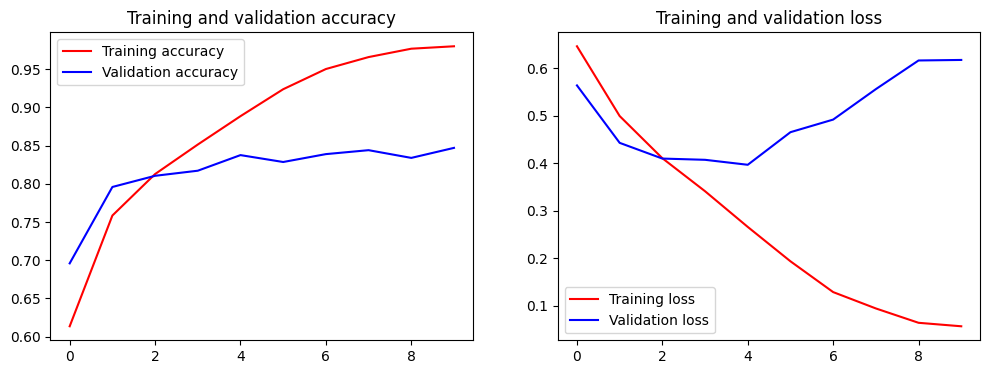

In [4]:
#plot the loss and accuracy
##your code goes here##

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
581/581 [==============================] - 11s 14ms/step - loss: 0.1358 - accuracy: 0.9517 - val_loss: 0.0175 - val_accuracy: 0.9949
Epoch 2/50
581/581 [==============================] - 9s 15ms/step - loss: 0.0487 - accuracy: 0.9836 - val_loss: 0.0128 - val_accuracy: 0.9952
Epoch 3/50
581/581 [==============================] - 9s 15ms/step - loss: 0.0376 - accuracy: 0.9887 - val_loss: 0.0097 - val_accuracy: 0.9968
Epoch 4/50
581/581 [==============================] - 8s 13ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0094 - val_accuracy: 0.9965
Epoch 5/50
581/581 [==============================] - 9s 15ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0102 - val_accuracy: 0.9975
Epoch 6/50
581/581 [==============================] - 9s 15ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0109 - val_accuracy: 0.9971
Epoch 7/50
581/581 [==============================] - 9s 15ms/step - loss: 0

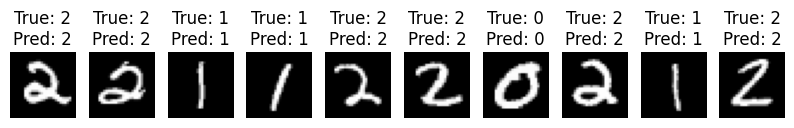

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# دانلود مجموعه داده MNIST
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# انتخاب فقط ارقام 0، 1 و 2
mask_train = np.isin(y_train_full, [0, 1, 2])
mask_test = np.isin(y_test_full, [0, 1, 2])

X_train = X_train_full[mask_train]
y_train = y_train_full[mask_train]
X_test = X_test_full[mask_test]
y_test = y_test_full[mask_test]

# تغییر شکل داده‌ها به فرمت مناسب برای Conv2D و نرمال‌سازی مقادیر پیکسل‌ها به محدوده [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# تبدیل برچسب‌ها به قالب one-hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

# ساخت مدل شبکه عصبی کانولوشنی
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# کامپایل مدل
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# داده‌افزایی
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

# آموزش مدل
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50, validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // 32)

# ارزیابی مدل
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

# پیش‌بینی برچسب‌ها
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# نمایش برخی از تصاویر و برچسب‌های پیش‌بینی شده
def plot_images(images, labels_true, labels_pred, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i].reshape((28, 28))
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {labels_true[i]}\nPred: {labels_pred[i]}')
        plt.axis('off')
    plt.show()

# انتخاب چند تصویر برای نمایش
num_images = 10
indices = np.random.choice(range(len(X_test)), num_images, replace=False)
plot_images(X_test[indices], y_test_true_classes[indices], y_test_pred_classes[indices])


In [9]:

# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
acc[-1]

0.9968802332878113

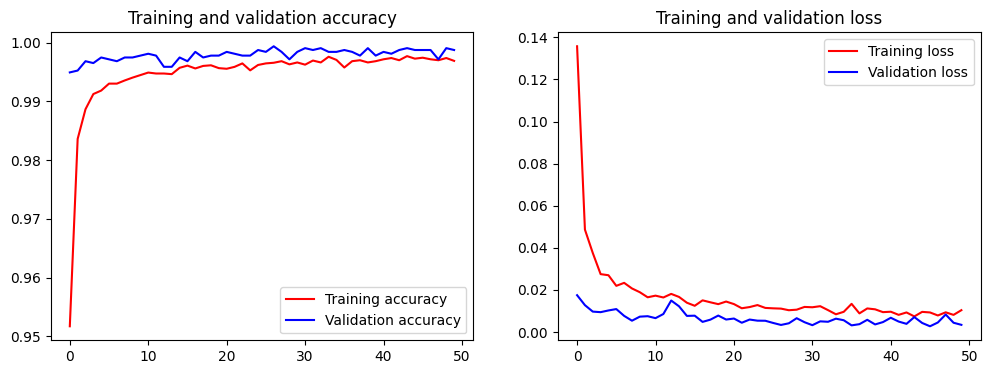

In [10]:
#plot the loss and accuracy
##your code goes here##

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()